In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import matplotlib

from write_read_cache import store_data, read_data
from read_events import read_events, get_events
from compute_par_inj import get_parasitic_injection, get_parasitic_injection_ADU, get_pedestals
from calculate_xray_gain import get_linear_gain_realfdt

cache_folder = "cache/transfer_function"

In [4]:
# Return raw data from transfer function file
def read_transfer_function(filepath):
    fdt_data = pd.read_csv(filepath, sep="\t", comment="#")
    return fdt_data


# Get fdt data from raw fdt data file
def get_fdt(fdt_data, ch, pt):
    dac_inj_list = np.unique(fdt_data.iloc[:, 1].to_numpy())

    dac_inj_all = []
    fdt_out_all = []
    for dac_inj in dac_inj_list:
        fdt_data_subset = fdt_data[
            (fdt_data.iloc[:, 1] == dac_inj) & (fdt_data.iloc[:, 3] == ch)
        ]
        dac_inj_all.append(dac_inj)
        fdt_out_all.append(np.mean(fdt_data_subset.iloc[:, 4]))

    return dac_inj_all, fdt_out_all


In [16]:
# Import transfer function data
fdt_m55_3mbar = read_transfer_function(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\TransferFunction_fast_tau5.dat"
)
store_data(fdt_m55_3mbar, "fdt_m55_3mbar", cache_folder)

fdt_m55_amb = read_transfer_function(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"
)
store_data(fdt_m55_amb, "fdt_m55_amb", cache_folder)

fdt_m37_amb = read_transfer_function(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"
)
store_data(fdt_m37_amb, "fdt_m37_amb", cache_folder)


In [5]:
# Get module temperature in Celsius
def get_temperature(temp_code):
    V_T = 0.9 * 1000 - (temp_code - 1024) * 1.72 / (3.87)
    T = 30 + (5.506 - np.sqrt((-5.506) ** 2 + 4 * 0.00172 * (870.6 - V_T))) / (
        2 * (-0.00172)
    )
    return [np.round(T, 1)]


# Get real asic temperature
def get_temperature_file(filepath):
    temp_raw = pd.read_csv(
        filepath,
        comment="#",
        sep="\t",
        header=None,
    )
    temp_celsius = get_temperature(np.mean(temp_raw.iloc[:, 1]))[0]

    return temp_celsius


-44.7
-52.9
-36.6


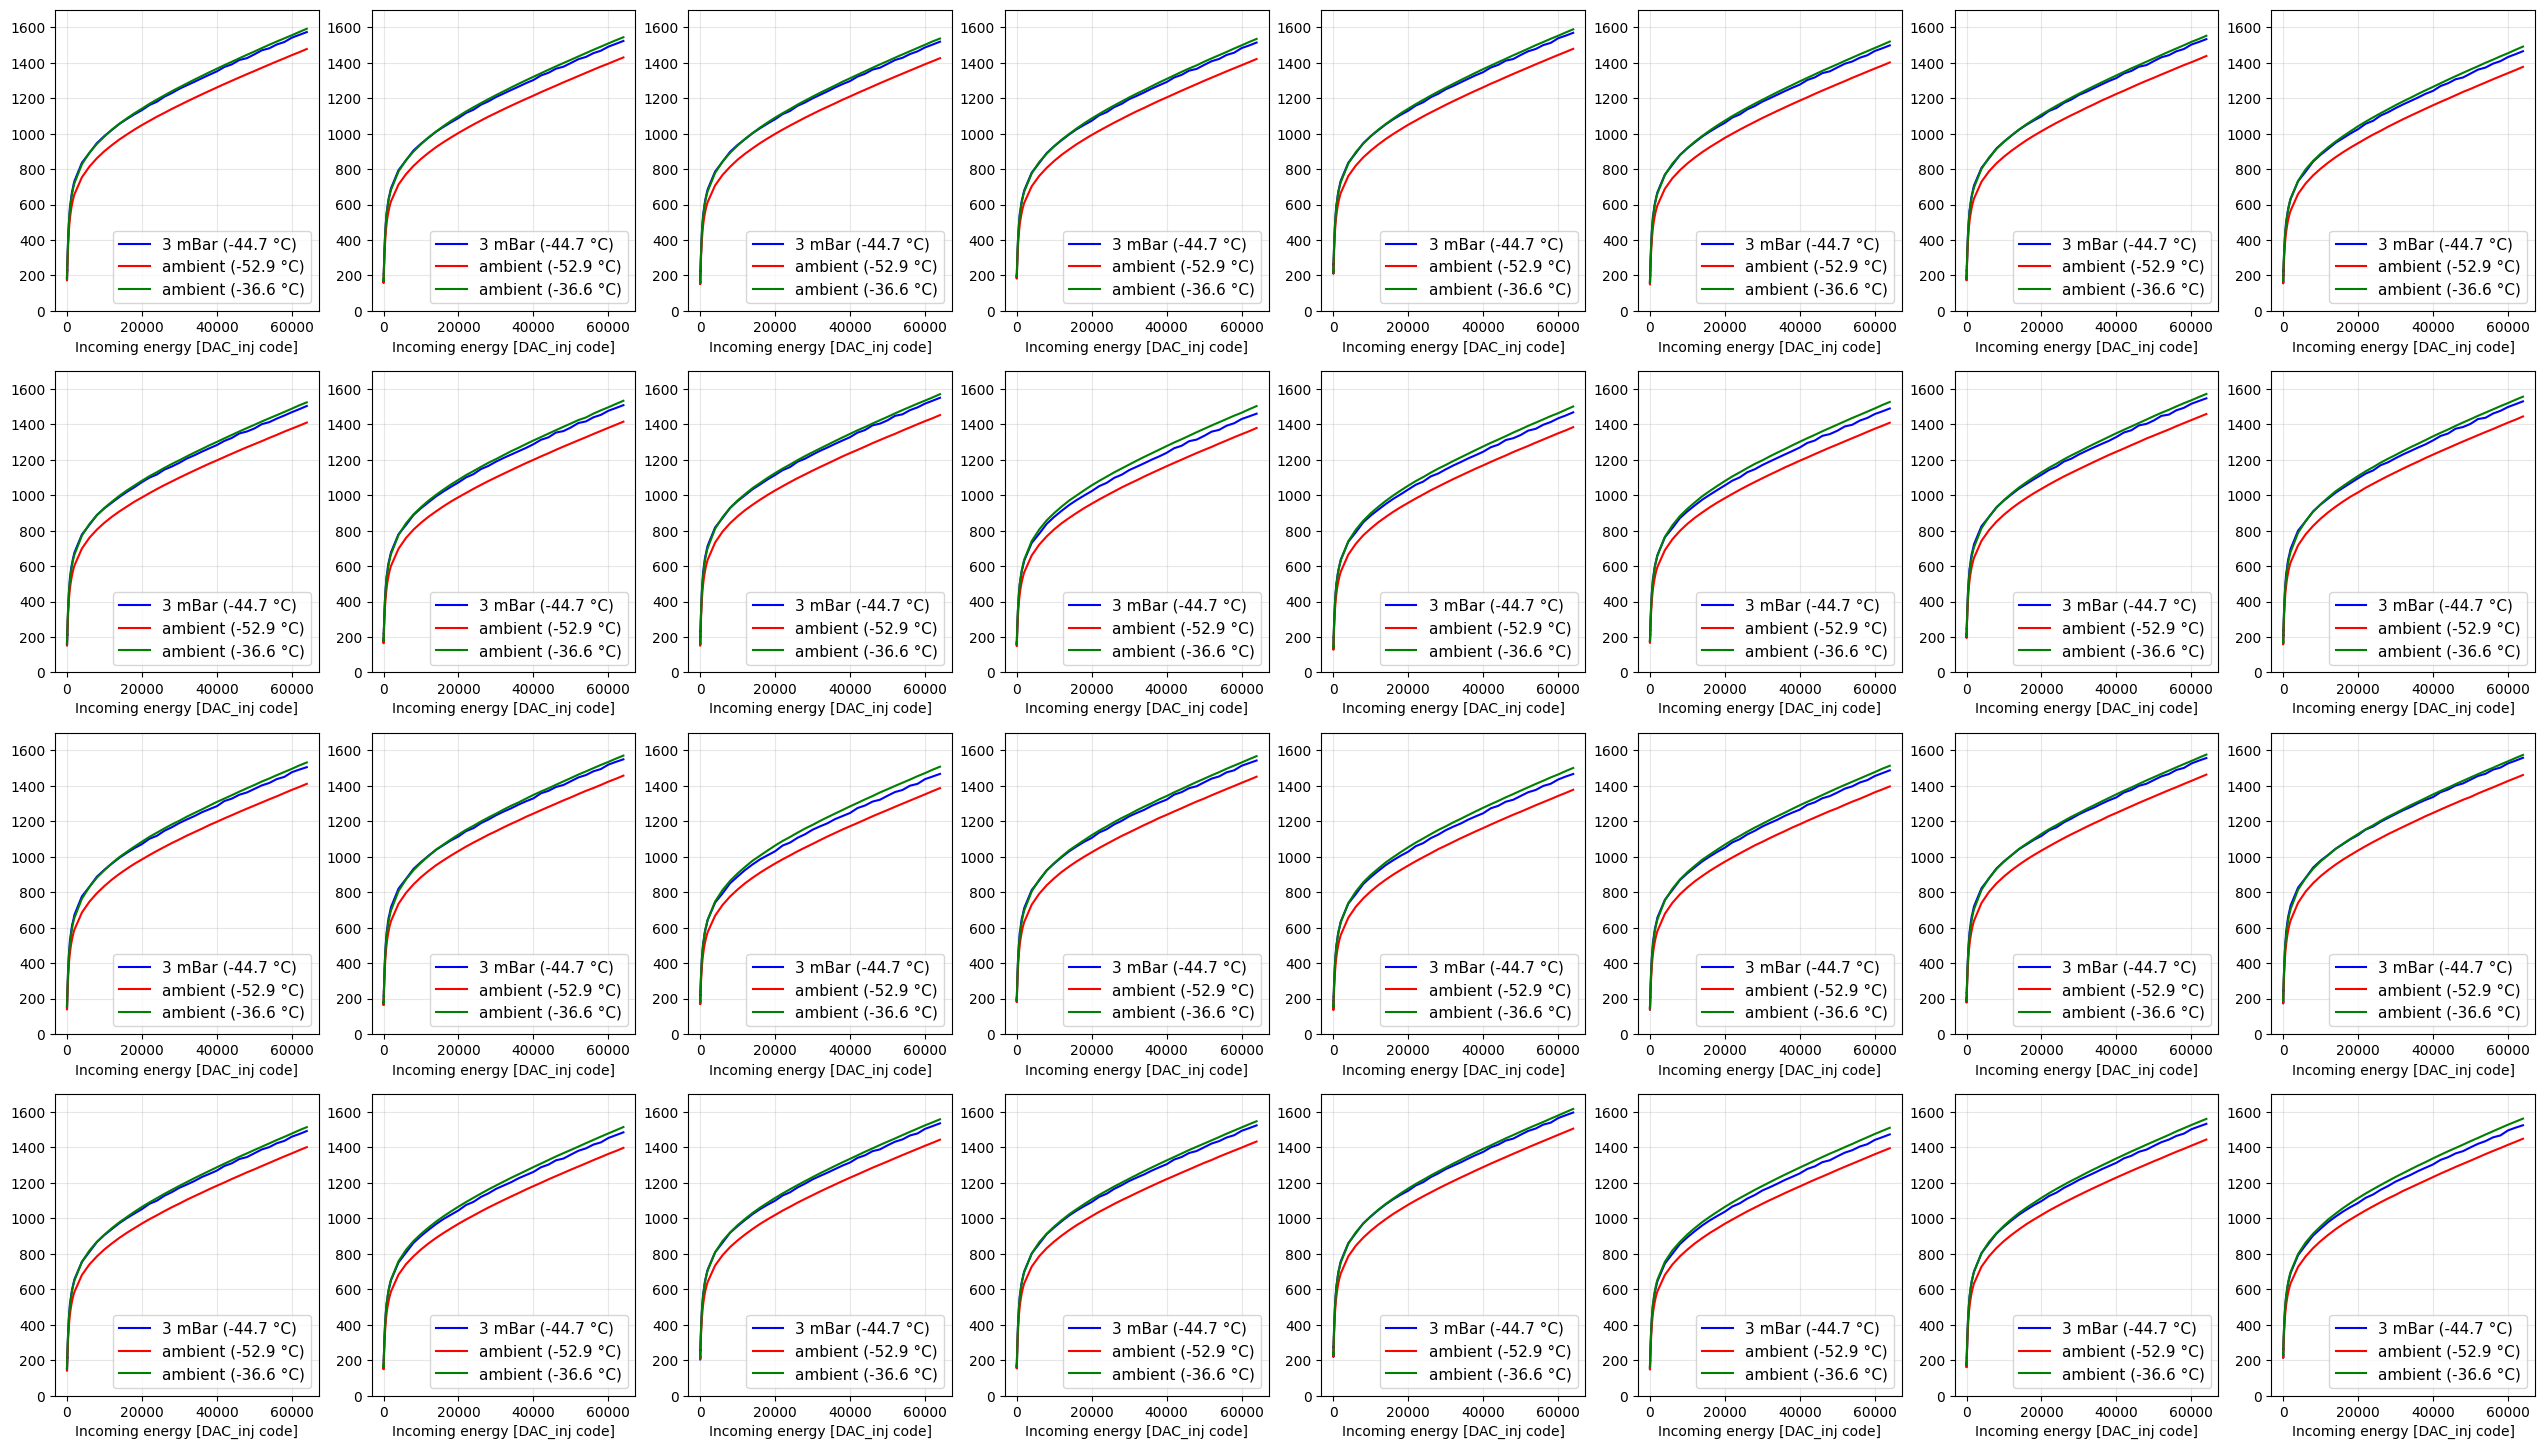

In [18]:
# Transfer function at -55 C and 3 mBar

fdt_m55_3mbar = read_data("fdt_m55_3mbar", cache_folder)
fdt_m55_amb = read_data("fdt_m55_amb", cache_folder)
fdt_m37_amb = read_data("fdt_m37_amb", cache_folder)

# Get real temperature from board
temp_m55_3mbar = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\HK_Temperature.dat"
)
temp_m55_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

temp_m37_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

print(temp_m55_3mbar)
print(temp_m55_amb)
print(temp_m37_amb)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 4, 6 * 3]

plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    dac_inj, fdt_out = get_fdt(
        fdt_m55_3mbar,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="blue", label="3 mBar (-44.7 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m55_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="red", label="ambient (-52.9 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m37_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="green", label="ambient (-36.6 °C)")

    plt.legend(fontsize=11)
    plt.xlabel("Incoming energy [DAC_inj code]")
    plt.ylim([0, 1700])
    plt.grid(alpha=0.3)

plt.show()


-44.7
-52.9
-36.6


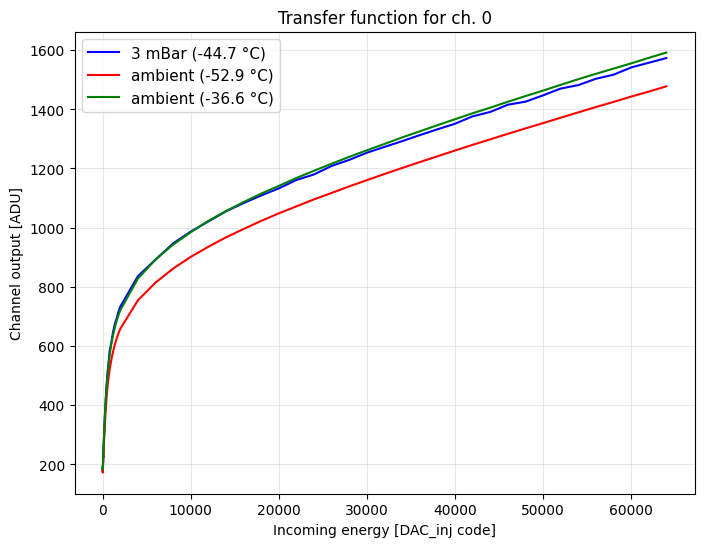

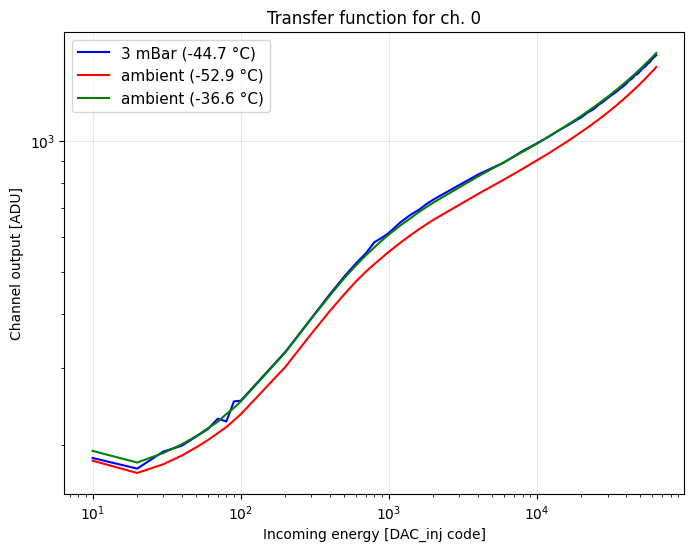

In [56]:
# Transfer function at -55 C and 3 mBar

fdt_m55_3mbar = read_data("fdt_m55_3mbar", cache_folder)
fdt_m55_amb = read_data("fdt_m55_amb", cache_folder)
fdt_m37_amb = read_data("fdt_m37_amb", cache_folder)

# Get real temperature from board
temp_m55_3mbar = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\HK_Temperature.dat"
)
temp_m55_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

temp_m37_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

print(temp_m55_3mbar)
print(temp_m55_amb)
print(temp_m37_amb)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8, 6]

plt.clf()
for ch in [0]:
    dac_inj, fdt_out = get_fdt(
        fdt_m55_3mbar,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="blue", label="3 mBar (-44.7 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m55_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="red", label="ambient (-52.9 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m37_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="green", label="ambient (-36.6 °C)")

    plt.legend(fontsize=11)
    plt.xlabel("Incoming energy [DAC_inj code]")
    plt.ylabel("Channel output [ADU]")
    plt.title("Transfer function for ch. 0")
    plt.grid(alpha=0.3)

plt.show()

plt.clf()
for ch in [0]:
    dac_inj, fdt_out = get_fdt(
        fdt_m55_3mbar,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="blue", label="3 mBar (-44.7 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m55_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="red", label="ambient (-52.9 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m37_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="green", label="ambient (-36.6 °C)")

    plt.legend(fontsize=11)
    plt.xlabel("Incoming energy [DAC_inj code]")
    plt.ylabel("Channel output [ADU]")
    plt.title("Transfer function for ch. 0")
    plt.grid(alpha=0.3)
    plt.yscale("log")
    plt.xscale("log")

plt.show()


-44.7
-52.9
-36.6


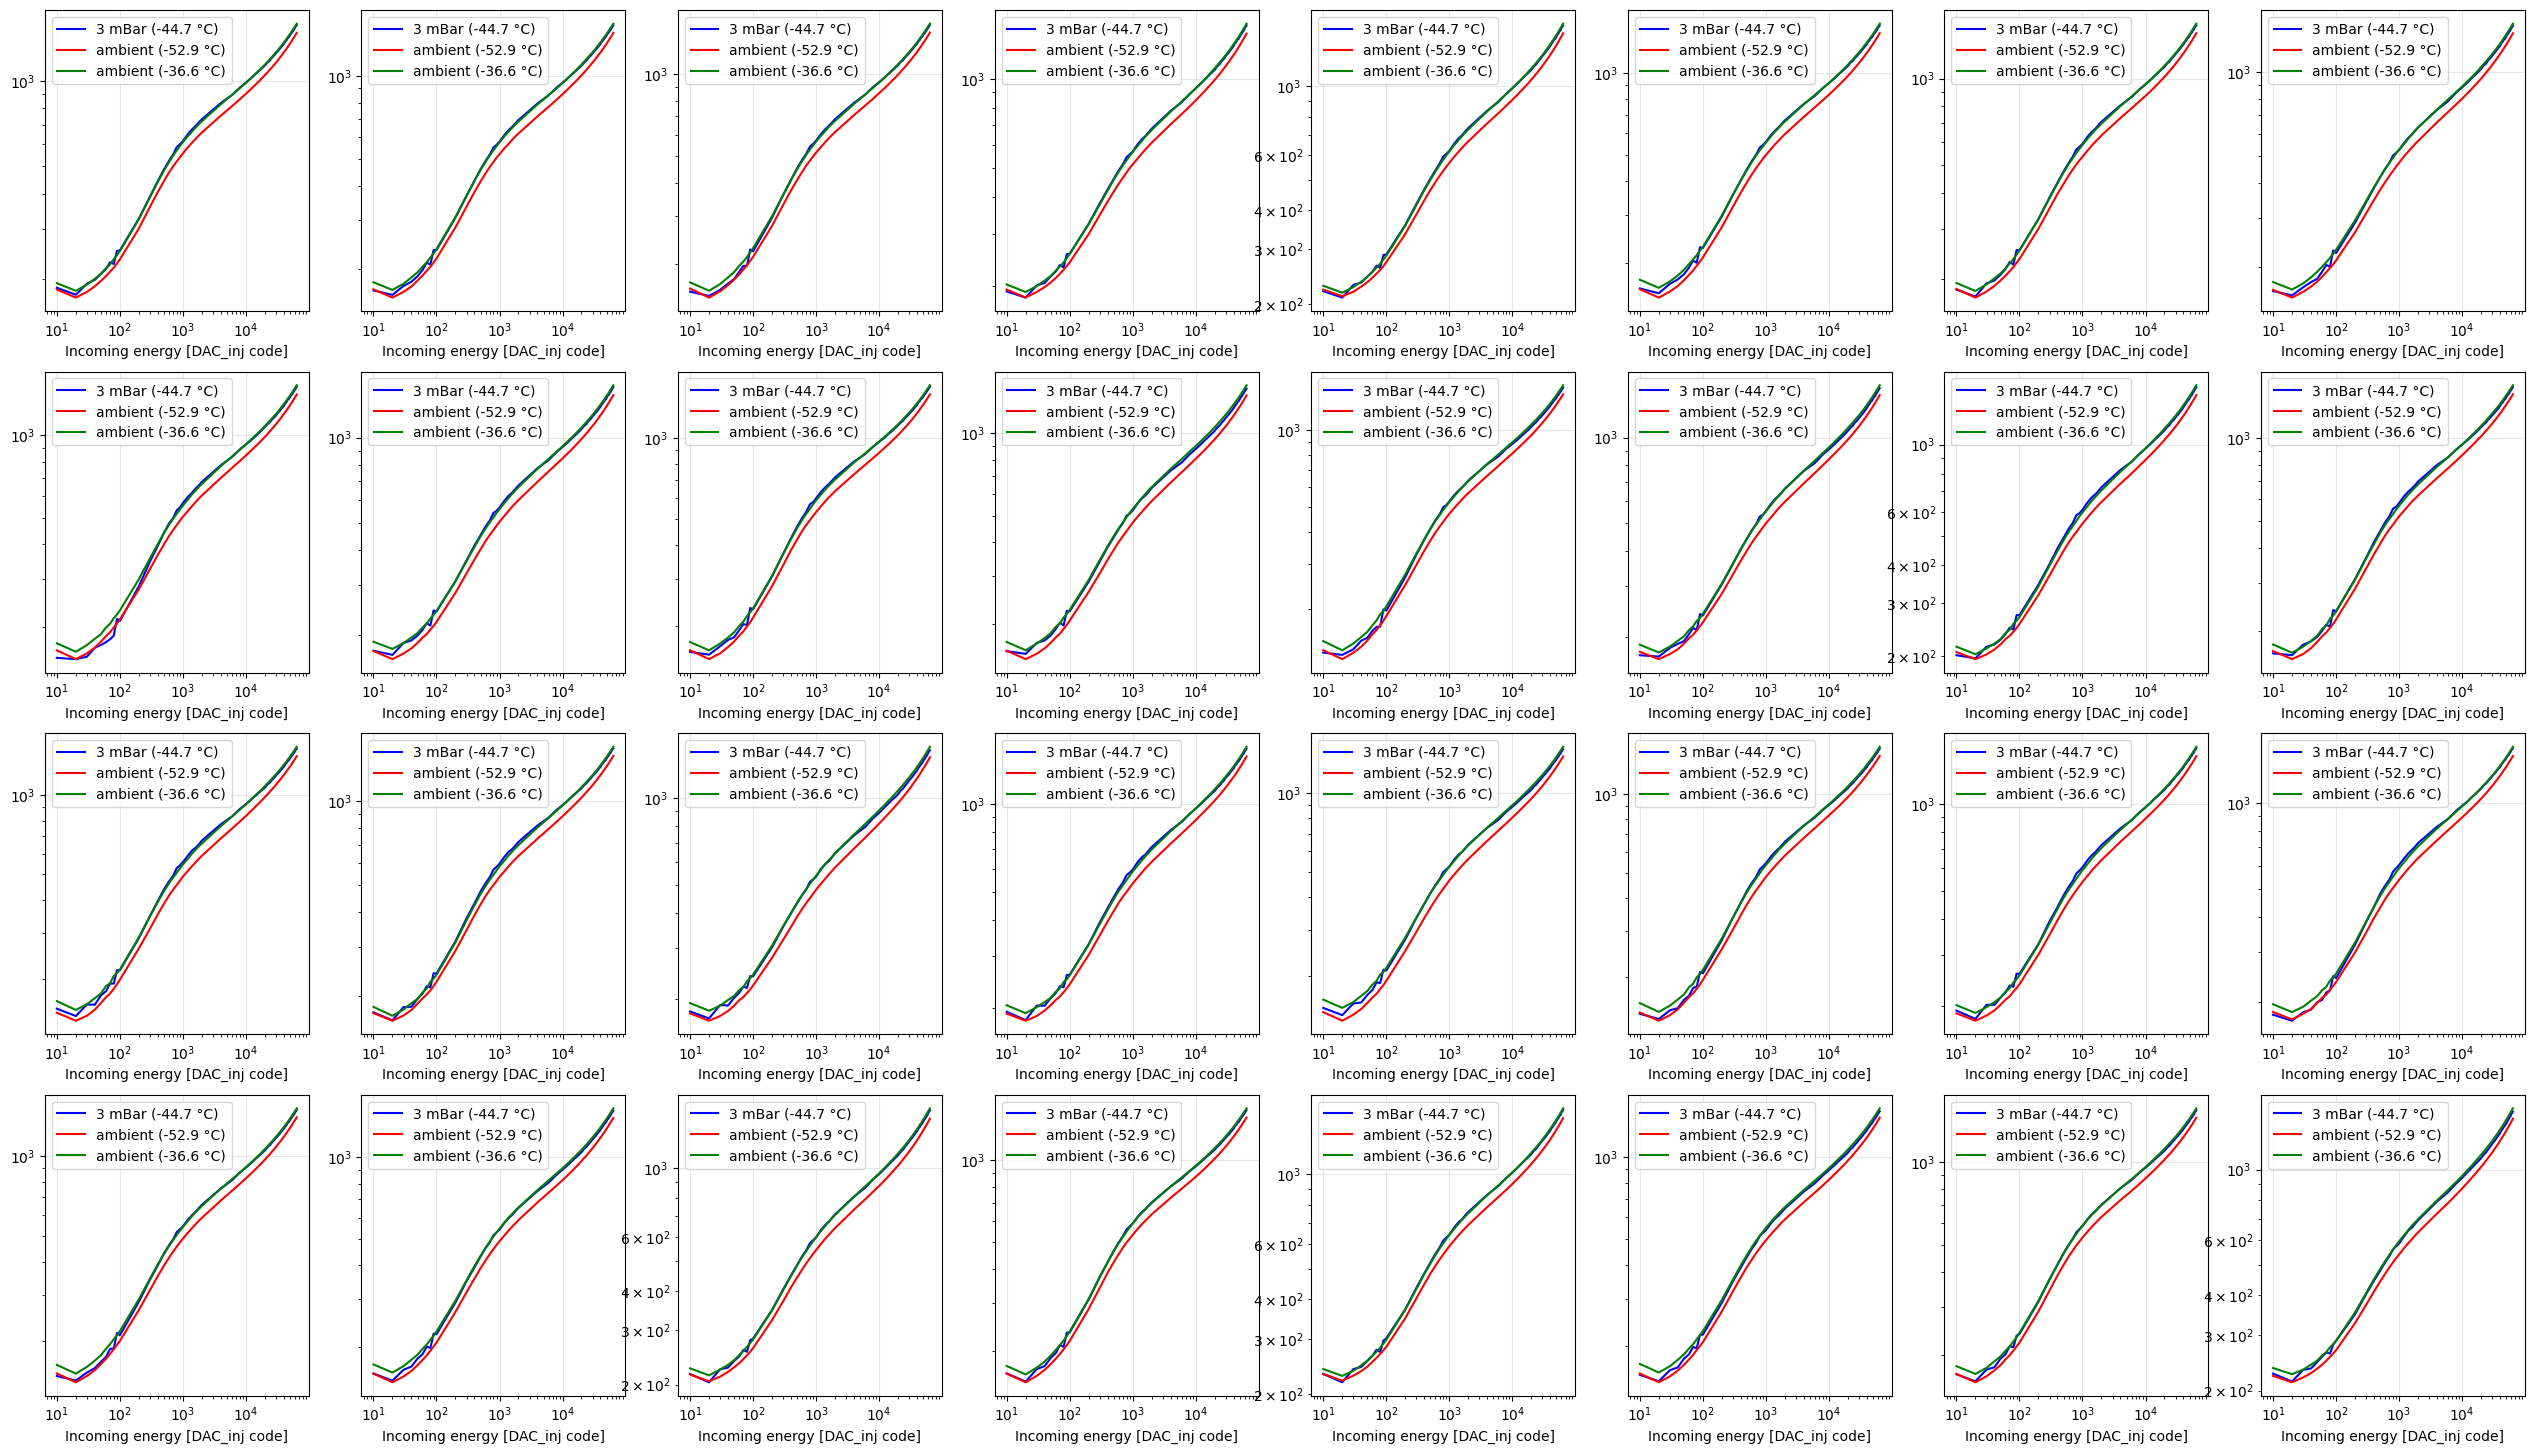

In [49]:
# Transfer function at -55 C and 3 mBar

fdt_m55_3mbar = read_data("fdt_m55_3mbar", cache_folder)
fdt_m55_amb = read_data("fdt_m55_amb", cache_folder)
fdt_m37_amb = read_data("fdt_m37_amb", cache_folder)

# Get real temperature from board
temp_m55_3mbar = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\HK_Temperature.dat"
)
temp_m55_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

temp_m37_amb = get_temperature_file(
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\HK_Temperature.dat"
)

print(temp_m55_3mbar)
print(temp_m55_amb)
print(temp_m37_amb)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 4, 6 * 3]

plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    dac_inj, fdt_out = get_fdt(
        fdt_m55_3mbar,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="blue", label="3 mBar (-44.7 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m55_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="red", label="ambient (-52.9 °C)")

    dac_inj, fdt_out = get_fdt(
        fdt_m37_amb,
        ch,
        5,
    )
    plt.plot(dac_inj, fdt_out, color="green", label="ambient (-36.6 °C)")

    plt.legend(fontsize=10)
    plt.xlabel("Incoming energy [DAC_inj code]")
    plt.grid(alpha=0.3)
    plt.yscale("log")
    plt.xscale("log")

plt.show()

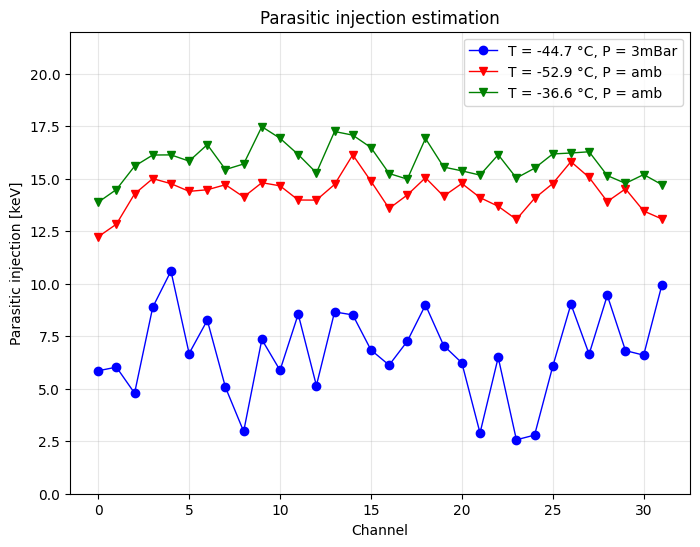

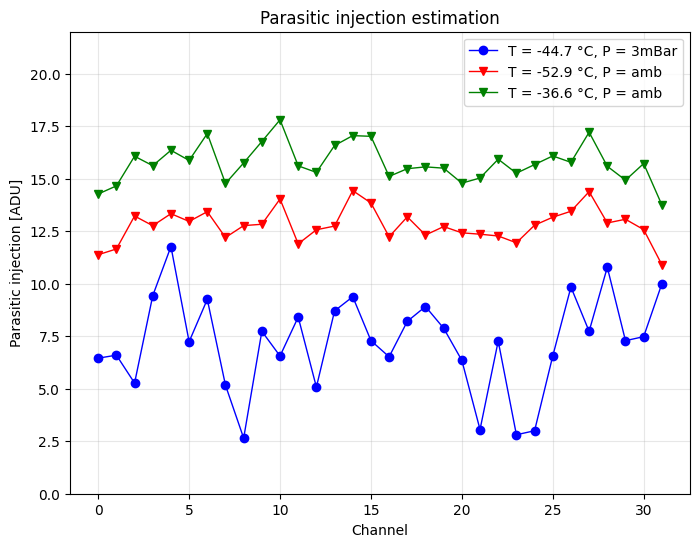

In [9]:
# Calculate parasitic injection for all channels

ped_m55_3mbar_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\Pedestals_tau5.dat"
fdt_m55_3mbar_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\TransferFunction_fast_tau5.dat"

ped_m55_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\Pedestals_tau5.dat"
fdt_m55_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"

ped_m37_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\Pedestals_tau5.dat"
fdt_m37_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"

channels = range(0, 32)

# Parasitic injection in keV
par_inj_m55_3mbar_allch = []
par_inj_m55_amb_allch = []
par_inj_m37_amb_allch = []

for ch in channels:
    ch_par_inj = get_parasitic_injection(
        ped_m55_3mbar_filepath, fdt_m55_3mbar_filepath, ch, 5
    )
    par_inj_m55_3mbar_allch.append(ch_par_inj)

    ch_par_inj = get_parasitic_injection(
        ped_m55_amb_filepath, fdt_m55_amb_filepath, ch, 5
    )
    par_inj_m55_amb_allch.append(ch_par_inj)

    ch_par_inj = get_parasitic_injection(
        ped_m37_amb_filepath, fdt_m37_amb_filepath, ch, 5
    )
    par_inj_m37_amb_allch.append(ch_par_inj)

matplotlib.rcParams["figure.figsize"] = [8, 6]

plt.clf()
plt.plot(
    channels,
    par_inj_m55_3mbar_allch,
    "-o",
    color="blue",
    linewidth=1,
    label="T = -44.7 °C, P = 3mBar",
)
plt.plot(
    channels,
    par_inj_m55_amb_allch,
    "-v",
    color="red",
    linewidth=1,
    label="T = -52.9 °C, P = amb",
)
plt.plot(
    channels,
    par_inj_m37_amb_allch,
    "-v",
    color="green",
    linewidth=1,
    label="T = -36.6 °C, P = amb",
)

plt.ylim([0, 22])
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Parasitic injection [keV]")
plt.title("Parasitic injection estimation")
plt.grid(alpha=0.3)
plt.show()

# Parasitic injection in ADU
par_inj_m55_3mbar_allch = []
par_inj_m55_amb_allch = []
par_inj_m37_amb_allch = []

for ch in channels:
    ch_par_inj = get_parasitic_injection_ADU(
        ped_m55_3mbar_filepath, fdt_m55_3mbar_filepath, ch, 5
    )
    par_inj_m55_3mbar_allch.append(ch_par_inj)

    ch_par_inj = get_parasitic_injection_ADU(
        ped_m55_amb_filepath, fdt_m55_amb_filepath, ch, 5
    )
    par_inj_m55_amb_allch.append(ch_par_inj)

    ch_par_inj = get_parasitic_injection_ADU(
        ped_m37_amb_filepath, fdt_m37_amb_filepath, ch, 5
    )
    par_inj_m37_amb_allch.append(ch_par_inj)

matplotlib.rcParams["figure.figsize"] = [8, 6]

plt.clf()
plt.plot(
    channels,
    par_inj_m55_3mbar_allch,
    "-o",
    color="blue",
    linewidth=1,
    label="T = -44.7 °C, P = 3mBar",
)
plt.plot(
    channels,
    par_inj_m55_amb_allch,
    "-v",
    color="red",
    linewidth=1,
    label="T = -52.9 °C, P = amb",
)
plt.plot(
    channels,
    par_inj_m37_amb_allch,
    "-v",
    color="green",
    linewidth=1,
    label="T = -36.6 °C, P = amb",
)

plt.ylim([0, 22])
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Parasitic injection [ADU]")
plt.title("Parasitic injection estimation")
plt.grid(alpha=0.3)
plt.show()


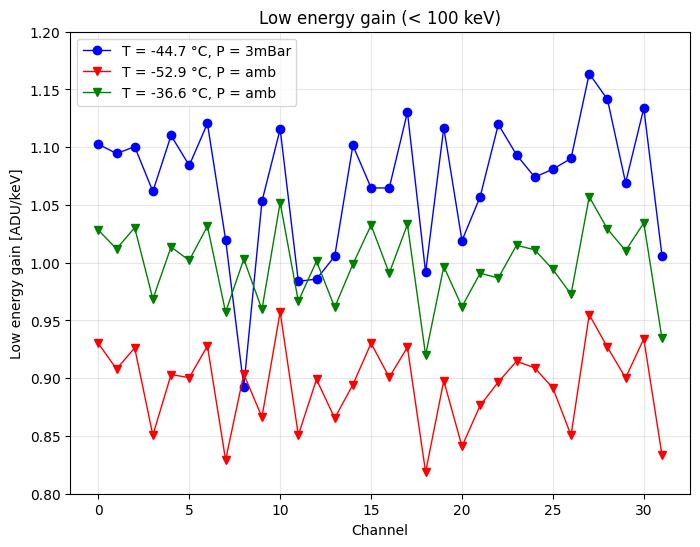

In [10]:
# Calculate channel gain
fdt_m55_3mbar_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\TransferFunction_fast_tau5.dat"
fdt_m55_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"
fdt_m37_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"

channels = range(0, 32)
pt = 5
fdt_gain_m55_3mbar_allch = []
fdt_gain_m55_amb_allch = []
fdt_gain_m37_amb_allch = []

for ch in channels:
    (fdt_gain, fdt_pedestal) = get_linear_gain_realfdt(fdt_m55_3mbar_filepath, ch, pt, 200)
    fdt_gain_m55_3mbar_allch.append(fdt_gain)
    (fdt_gain, fdt_pedestal) = get_linear_gain_realfdt(fdt_m55_amb_filepath, ch, pt, 200)
    fdt_gain_m55_amb_allch.append(fdt_gain)
    (fdt_gain, fdt_pedestal) = get_linear_gain_realfdt(fdt_m37_amb_filepath, ch, pt, 200)
    fdt_gain_m37_amb_allch.append(fdt_gain)

plt.clf()
plt.plot(
    channels,
    fdt_gain_m55_3mbar_allch,
    "-o",
    color="blue",
    linewidth=1,
    label="T = -44.7 °C, P = 3mBar",
)
plt.plot(
    channels,
    fdt_gain_m55_amb_allch,
    "-v",
    color="red",
    linewidth=1,
    label="T = -52.9 °C, P = amb",
)
plt.plot(
    channels,
    fdt_gain_m37_amb_allch,
    "-v",
    color="green",
    linewidth=1,
    label="T = -36.6 °C, P = amb",
)

plt.legend()
plt.ylim([0.8, 1.2])
plt.xlabel("Channel")
plt.ylabel("Low energy gain [ADU/keV]")
plt.title("Low energy gain (< 100 keV)")
plt.grid(alpha=0.3)
plt.show()    

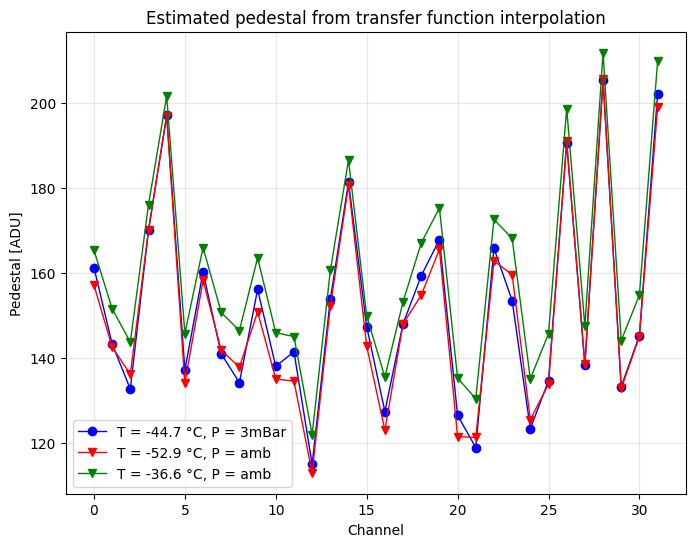

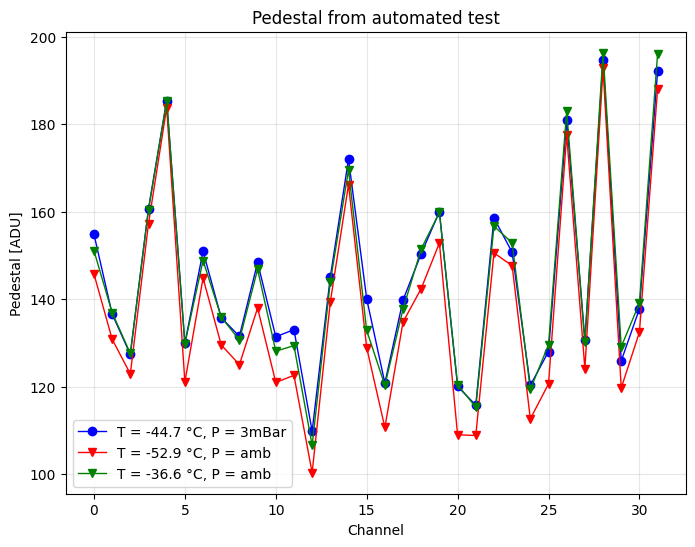

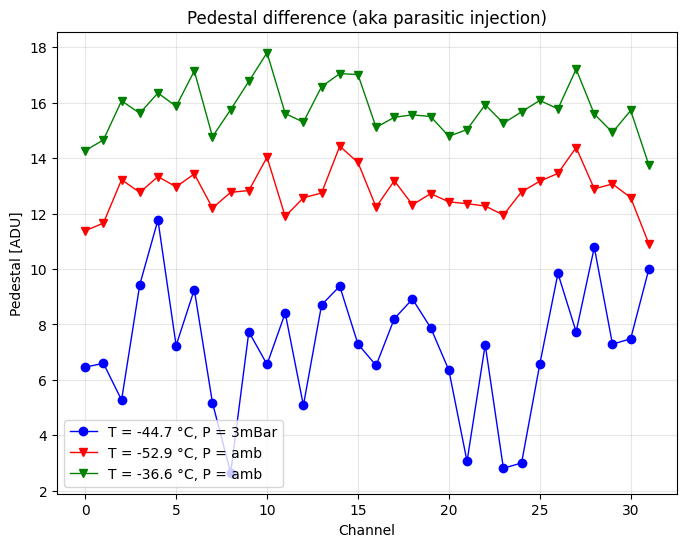

In [15]:
# Calculate parasitic injection for all channels

ped_m55_3mbar_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\Pedestals_tau5.dat"
fdt_m55_3mbar_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\TransferFunction_fast_tau5.dat"

ped_m55_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\Pedestals_tau5.dat"
fdt_m55_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun3_-55C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"

ped_m37_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\Pedestals_tau5.dat"
fdt_m37_amb_filepath = r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\test_before\module_029_MIT_before_tvac\2022-09-16\autoRun1_-37C_ISA011_TBBB0110_HRRR0011\data\TransferFunction_fast_tau5.dat"

channels = range(0, 32)

# Parasitic injection in keV
fdt_ped_m55_3mbar_allch = []
ch_ped_m55_3mbar_allch = []

fdt_ped_m55_amb_allch = []
ch_ped_m55_amb_allch = []

fdt_ped_m37_amb_allch = []
ch_ped_m37_amb_allch = []

for ch in channels:
    fdt_ped, ch_ped = get_pedestals(
        ped_m55_3mbar_filepath, fdt_m55_3mbar_filepath, ch, 5
    )
    fdt_ped_m55_3mbar_allch.append(fdt_ped)
    ch_ped_m55_3mbar_allch.append(ch_ped)

    fdt_ped, ch_ped = get_pedestals(ped_m55_amb_filepath, fdt_m55_amb_filepath, ch, 5)
    fdt_ped_m55_amb_allch.append(fdt_ped)
    ch_ped_m55_amb_allch.append(ch_ped)

    fdt_ped, ch_ped = get_pedestals(ped_m37_amb_filepath, fdt_m37_amb_filepath, ch, 5)
    fdt_ped_m37_amb_allch.append(fdt_ped)
    ch_ped_m37_amb_allch.append(ch_ped)

matplotlib.rcParams["figure.figsize"] = [8, 6]

# Estimated pedestal from transfer function interpolation
plt.clf()
plt.plot(
    channels,
    fdt_ped_m55_3mbar_allch,
    "-o",
    color="blue",
    linewidth=1,
    label="T = -44.7 °C, P = 3mBar",
)
plt.plot(
    channels,
    fdt_ped_m55_amb_allch,
    "-v",
    color="red",
    linewidth=1,
    label="T = -52.9 °C, P = amb",
)
plt.plot(
    channels,
    fdt_ped_m37_amb_allch,
    "-v",
    color="green",
    linewidth=1,
    label="T = -36.6 °C, P = amb",
)

plt.legend()
plt.xlabel("Channel")
plt.ylabel("Pedestal [ADU]")
plt.title("Estimated pedestal from transfer function interpolation")
plt.grid(alpha=0.3)
plt.show()

# Pedestal from automated test
plt.clf()
plt.plot(
    channels,
    ch_ped_m55_3mbar_allch,
    "-o",
    color="blue",
    linewidth=1,
    label="T = -44.7 °C, P = 3mBar",
)
plt.plot(
    channels,
    ch_ped_m55_amb_allch,
    "-v",
    color="red",
    linewidth=1,
    label="T = -52.9 °C, P = amb",
)
plt.plot(
    channels,
    ch_ped_m37_amb_allch,
    "-v",
    color="green",
    linewidth=1,
    label="T = -36.6 °C, P = amb",
)

plt.legend()
plt.xlabel("Channel")
plt.ylabel("Pedestal [ADU]")
plt.title("Pedestal from automated test")
plt.grid(alpha=0.3)
plt.show()

# Pedestal difference
ped_diff_m55_3mbar_allch = [
    fdt_ped_m55_3mbar_allch[i] - ch_ped_m55_3mbar_allch[i]
    for i in range(0, len(ch_ped_m55_3mbar_allch))
]
ped_diff_m55_amb_allch = [
    fdt_ped_m55_amb_allch[i] - ch_ped_m55_amb_allch[i]
    for i in range(0, len(ch_ped_m55_amb_allch))
]
ped_diff_m37_amb_allch = [
    fdt_ped_m37_amb_allch[i] - ch_ped_m37_amb_allch[i]
    for i in range(0, len(ch_ped_m37_amb_allch))
]

plt.clf()
plt.plot(
    channels,
    ped_diff_m55_3mbar_allch,
    "-o",
    color="blue",
    linewidth=1,
    label="T = -44.7 °C, P = 3mBar",
)
plt.plot(
    channels,
    ped_diff_m55_amb_allch,
    "-v",
    color="red",
    linewidth=1,
    label="T = -52.9 °C, P = amb",
)
plt.plot(
    channels,
    ped_diff_m37_amb_allch,
    "-v",
    color="green",
    linewidth=1,
    label="T = -36.6 °C, P = amb",
)

plt.legend()
plt.xlabel("Channel")
plt.ylabel("Pedestal [ADU]")
plt.title("Pedestal difference (aka parasitic injection)")
plt.grid(alpha=0.3)
plt.show()
